Загружаем данные

In [5]:
import pandas as pd
data = pd.read_csv('C:/Users/Nastya/Desktop/data_analyse/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv', encoding="cp1251")

Импортируем библиотеку

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

Просматриваем первые пять строк выборки

In [7]:
data.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


Заменяем пропущенные значения на среднее

In [8]:
data = data.fillna(data.mean())

Выбираем количественные столбцы и таргет столбец

In [25]:
x = data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = data['TargetBuy']
y = y.astype('int')

Делим выборку на train и test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

Строим дерево решений глубины 4

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree = tree.fit(X_train, y_train)

Получаем прогнозы по нашему дереву

In [28]:
from sklearn.metrics import confusion_matrix
preds = tree.predict(X_test)
confusion_matrix(y_test, preds)

array([[6141,  509],
       [1274,  966]], dtype=int64)

Строим ROC-кривую

In [29]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
preds_prob = tree.predict_proba(X_test)
pred = preds_prob[:, -1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

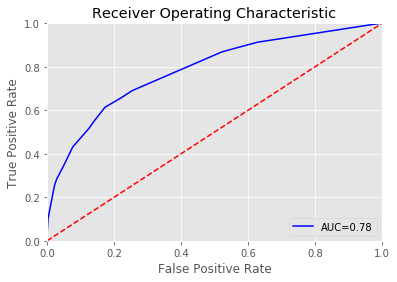

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC=%0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC-кривая получилась довольно хорошей, учитывая то, что площадь под ней AUC = 0.78